In [7]:
import pandas as pd


In [8]:
df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/12591a2e-3735-4471-959b-69782eb0f62f')

In [9]:
colonnes_a_supprimer = ['prenom', 'libelle_departement']

df = df.drop(columns=colonnes_a_supprimer)

In [10]:
df = df.loc[df['code_departement'] != 'fr_etranger']
df

,code_departement,nom,voix
0,01,ARTHAUD,1658
1,02,ARTHAUD,2038
2,03,ARTHAUD,1359
3,04,ARTHAUD,505
4,05,ARTHAUD,428
...,...,...,...
1599,988,nuls,689
1600,987,nuls,1935
1601,975,nuls,25
1602,986,nuls,17


In [11]:
correspondance_partis = {'nom': ['MACRON', 'LE PEN', 'MÉLENCHON', 'ZEMMOUR', 'JADOT', 'LASSALLE', 'PÉCRESSE','ROUSSEL', 'HIDALGO', 'DUPONT-AIGNAN', 'POUTOU', 'ARTHAUD', 'abstentions', 'blancs', 'nuls'],
                         'parti_politique': ['LREM', 'RN', 'LFI', 'Reconuête', 'EELV', 'Résistons', 'LR', 'PCF', 'PS', 'DLF', 'NPA', 'LO', 'abstentions','blancs', 'nuls' ]}


df_correspondance = pd.DataFrame(correspondance_partis)

df = pd.merge(df, df_correspondance, on='nom', how='left')
df = df.drop('nom', axis=1)

df.drop(df[(df['code_departement'] == '986') | (df['code_departement'] == '987') | (df['code_departement'] == '988') | (df['code_departement'] == '989')].index, inplace=True)



In [12]:
csv_data = df.to_csv()
sortie = './donnees/election2022.csv'
df.to_csv(sortie, index=False)

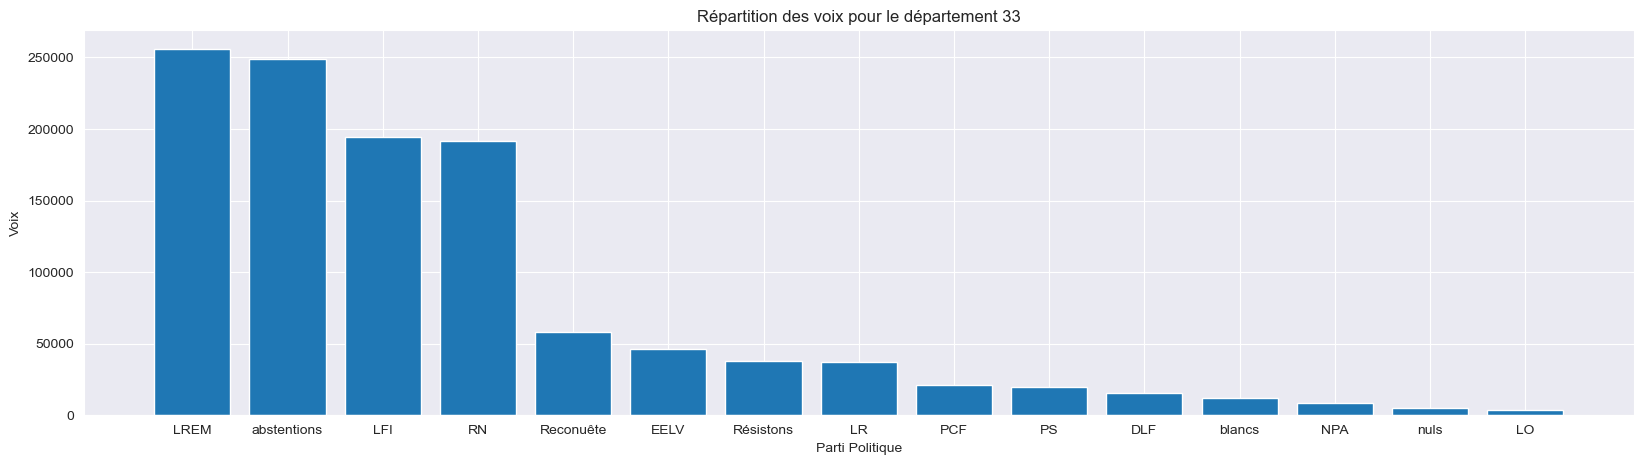

In [13]:


# DataViz

import matplotlib.pyplot as plt



code_departement_specifique = '33'
df_departement_specifique = df[df['code_departement'] == code_departement_specifique]
df_departement_specifique = df_departement_specifique.sort_values(by='voix', ascending=False)


plt.figure(figsize=(20, 5))
plt.bar(df_departement_specifique['parti_politique'], df_departement_specifique['voix'])
plt.xlabel('Parti Politique')
plt.ylabel('Voix')
plt.title(f'Répartition des voix pour le département {code_departement_specifique}')
plt.show()